In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql


In [10]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending = False)

df_DA_top_pay = df_DA_top_pay.head(10)


In [25]:
df_DA_skills= df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
df_DA_skills = df_DA_skills.head(10)
df_DA_skills

,count,median
job_skills,,
sql,714,87500.0
excel,472,77500.0
python,408,90000.0
tableau,398,90000.0
power bi,279,87500.0
r,244,90000.0
sas,200,84078.5
powerpoint,102,77500.0
word,89,75000.0


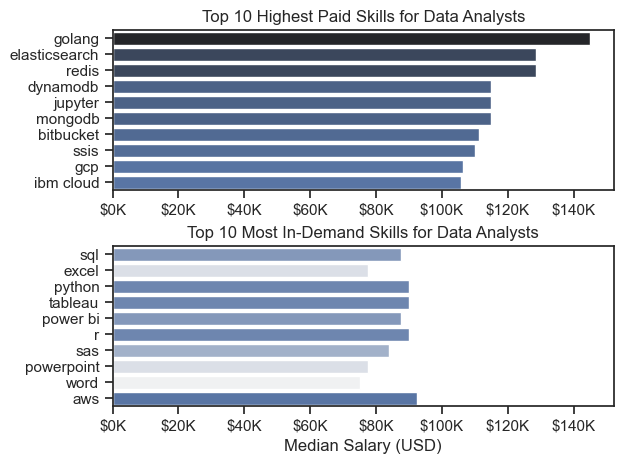

In [23]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data = df_DA_top_pay, 
                x = 'median', 
                y = df_DA_top_pay.index, 
                hue = 'median', 
                ax=ax[0],
                palette = 'dark:b_r')
ax[0].get_legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data = df_DA_skills, x = 'median', y = df_DA_skills.index, hue = 'median', ax=ax[1], palette = 'light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
fig.tight_layout(h_pad=0.5)


In [1]:

df_DA_skills

NameError: name 'df_DA_skills' is not defined